# Geocentric Models

## Random Walks of 1000 people

In [14]:
import numpy as np
from scipy.stats import norm,uniform, binom
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [3]:
walks = np.array(
    list(map(lambda _: np.append(np.array([0]), np.random.uniform(low=-1, high=1, size=16).cumsum()), range(1000)))
)

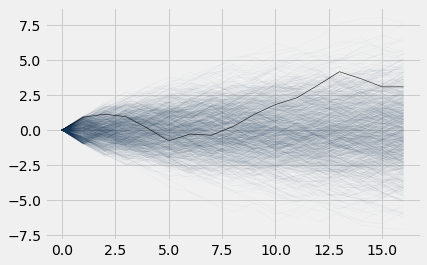

In [4]:
for i in walks:
    plt.plot(i, color="#123456", linewidth=0.02)
plt.plot(walks[0], color="black", linewidth=0.5)

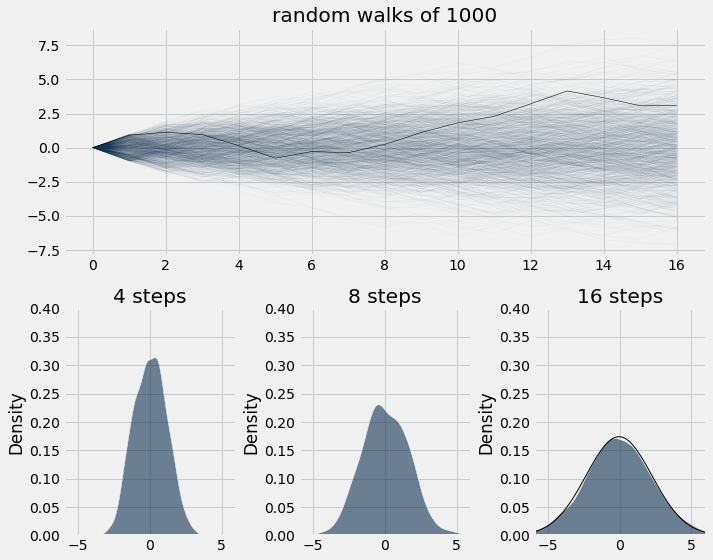

In [5]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

for i in walks:
    ax1.plot(i, color="#123456", linewidth=0.02)
ax1.plot(walks[0], color="black", linewidth=0.5)

get_plot = lambda ax, data: sns.kdeplot(data, color="#123456", alpha=0.6, multiple="stack", ax=ax)

get_plot(ax2, walks[:, 4])
get_plot(ax3, walks[:, 8])
get_plot(ax4, walks[:, 16])

ax1.set_title("random walks of 1000")
ax2.set_title("4 steps")
ax3.set_title("8 steps")
ax4.set_title("16 steps")

for ax in [ax2, ax3, ax4]:
    ax.set_xlim(-6, 6)
    ax.set_ylim(0, 0.4)
plt.tight_layout()

#add normal
data = walks[:, 16]
rv = norm(data.mean(), data.std(ddof=0))
xs = np.linspace(-6, 6, num=100)
ax4.plot(xs, rv.pdf(xs), color="black", linewidth=1)
plt.show()

In [15]:
# comparing calculations in earlier chapters

w, n = 6, 9
p_grid = np.linspace(0, 1, num=100)
posterior = binom(n, p_grid).pmf(w) * uniform(0, 1).pdf(p_grid)
posterior = posterior/sum(posterior)

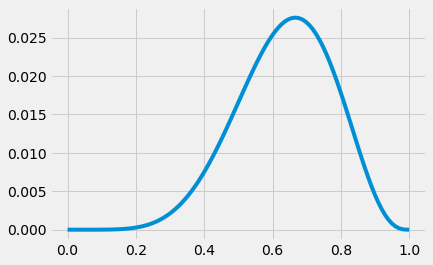

In [16]:
plt.plot(p_grid, posterior)